In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_squared_error, r2_score
import datetime

In [2]:
picadilly = pd.read_csv('./MCC_combined.csv',header=0,index_col=0)
sharston = pd.read_csv('./sharston_combined.csv',header=0,index_col=0)

sharston.index = pd.DatetimeIndex(sharston.index,freq='h')
picadilly.index = pd.DatetimeIndex(picadilly.index,freq='h')

In [3]:
#add NO2 / volume column
picadilly['NO2/Vol'] = picadilly['NO2'] / picadilly['Volume']
sharston['NO2/Vol'] = sharston['NO2'] / sharston['Volume']

# train_dates = picadilly[(picadilly.index >= train_start) & (picadilly.index < train_end ) ].index.to_numpy()
# test_dates = picadilly[(picadilly.index >= test_start) & (picadilly.index <= test_end ) ].index.to_numpy()

# train_shar = sharston[(sharston.index >= train_start ) & (sharston.index < train_end ) ]
# test_shar = sharston[(sharston.index >= test_start ) & (sharston.index <= test_end ) ]

# train_picadilly = picadilly[(picadilly.index >= train_start) & (picadilly.index < train_end ) ]
# test_picadilly = picadilly[(picadilly.index >= test_start) & (picadilly.index <= test_end ) ]


In [4]:
picadilly[['NO2','temp','ws','wd','Volume','day','month','hour']] =  picadilly[['NO2','temp','ws','wd','Volume','day','month','hour']].astype('int64')

In [5]:
sharston[['NO2','temp','ws','wd','Volume','day','month','hour']] =  sharston[['NO2','temp','ws','wd','Volume','day','month','hour']].astype('int64')

In [6]:
train_start , train_end = '2017-01-01' , '2020-03-23'
test_start, test_end = '2020-03-23' , '2020-04-23'

In [7]:
def create_df(data,target_variable):
    df = data.reset_index().rename(columns={'index':'ds',target_variable:'y'})
    return df 

In [8]:
def train_test_split(data):
    train = data[(data.ds >= train_start ) & (data.ds < train_end ) ]
    test = data[(data.ds >= test_start ) & (data.ds <= test_end ) ]
    return train, test

In [9]:
df_NO2_picadilly = create_df(picadilly,'NO2')
train_NO2_picadilly, test_NO2_picadilly = train_test_split(df_NO2_picadilly)
# NO2 only prophet model§
NO2_regressor = Prophet()
NO2_regressor.fit(train_NO2_picadilly)
NO2_forecast = NO2_regressor.predict(test_NO2_picadilly)

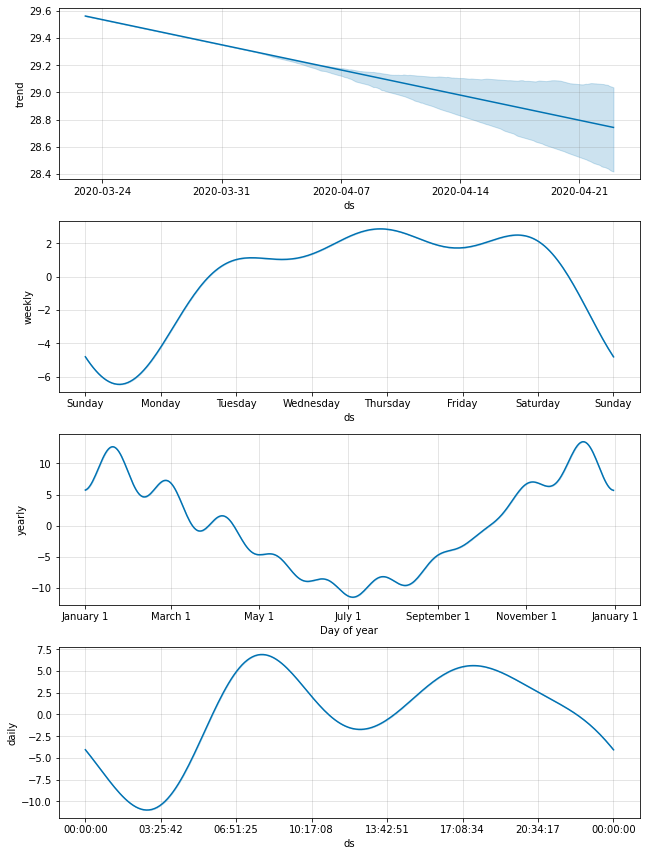

In [10]:
# Plot the components of the model
fig = NO2_regressor.plot_components(NO2_forecast)

In [11]:
#NO2 / Volume 
df_NO2vol_picadilly = create_df(picadilly,'NO2/Vol')
df_NO2vol_picadilly['y'] = np.log(picadilly['NO2/Vol'].to_numpy())
df_NO2vol_picadilly = df_NO2vol_picadilly.replace([np.inf, -np.inf], np.nan)
train_NO2vol_picadilly, test_NO2vol_picadilly = train_test_split(df_NO2vol_picadilly)

In [12]:
# NO2 only prophet model
NO2Vol_regressor = Prophet()
NO2Vol_regressor.fit(train_NO2vol_picadilly)
NO2Vol_forecast = NO2Vol_regressor.predict(test_NO2vol_picadilly)

In [13]:
vol_test_picadilly = picadilly[(picadilly.index >= test_start) & (picadilly.index <= test_end ) ]['Volume'].to_numpy()
NO2Vol_forecast['yhat_og'] = np.exp(NO2Vol_forecast['yhat'])*vol_test_picadilly

In [14]:
#meteorological + volume
df_MetVol_picadilly = create_df(picadilly,'NO2')
df_MetVol_picadilly['y'] = np.log(picadilly['NO2'].to_numpy())
df_MetVol_picadilly = df_MetVol_picadilly.replace([np.inf, -np.inf], np.nan)
train_MetVol_picadilly, test_MetVol_picadilly = train_test_split(df_MetVol_picadilly)

In [15]:
MetVol_regressor = Prophet()
MetVol_regressor.add_regressor('Volume')
MetVol_regressor.add_regressor('temp')
MetVol_regressor.add_regressor('ws')
MetVol_regressor.add_regressor('wd_1')
MetVol_regressor.add_regressor('wd_2')
MetVol_regressor.add_regressor('wd_3')
MetVol_regressor.add_regressor('wd_4')
MetVol_regressor.fit(train_MetVol_picadilly)
MetVol_regressor_forecast = MetVol_regressor.predict(test_MetVol_picadilly)

In [16]:
#All vars
df_vars_picadilly = create_df(picadilly,'NO2')
df_vars_picadilly['y'] = np.log(picadilly['NO2'].to_numpy())
df_vars_picadilly = df_vars_picadilly.replace([np.inf, -np.inf], np.nan)
train_vars_picadilly, test_vars_picadilly = train_test_split(df_vars_picadilly)

In [17]:
all_var_regressor = Prophet()
all_var_regressor.add_regressor('Volume')
all_var_regressor.add_regressor('temp')
all_var_regressor.add_regressor('ws')
all_var_regressor.add_regressor('wd_1')
all_var_regressor.add_regressor('wd_2')
all_var_regressor.add_regressor('wd_3')
all_var_regressor.add_regressor('wd_4')
all_var_regressor.add_regressor('Mon')
all_var_regressor.add_regressor('Tue')
all_var_regressor.add_regressor('Wed')
all_var_regressor.add_regressor('Thu')
all_var_regressor.add_regressor('Fri')
all_var_regressor.add_regressor('Sat')
all_var_regressor.add_regressor('Sun')
all_var_regressor.add_regressor('Jan')
all_var_regressor.add_regressor('Feb')
all_var_regressor.add_regressor('Mar')
all_var_regressor.add_regressor('Apr')
all_var_regressor.add_regressor('May')
all_var_regressor.add_regressor('June')
all_var_regressor.add_regressor('July')
all_var_regressor.add_regressor('Aug')
all_var_regressor.add_regressor('Sep')
all_var_regressor.add_regressor('Oct')
all_var_regressor.add_regressor('Nov')
all_var_regressor.add_regressor('Dec')
all_var_regressor.fit(train_vars_picadilly)
all_var_regressor_forecast = all_var_regressor.predict(test_vars_picadilly)

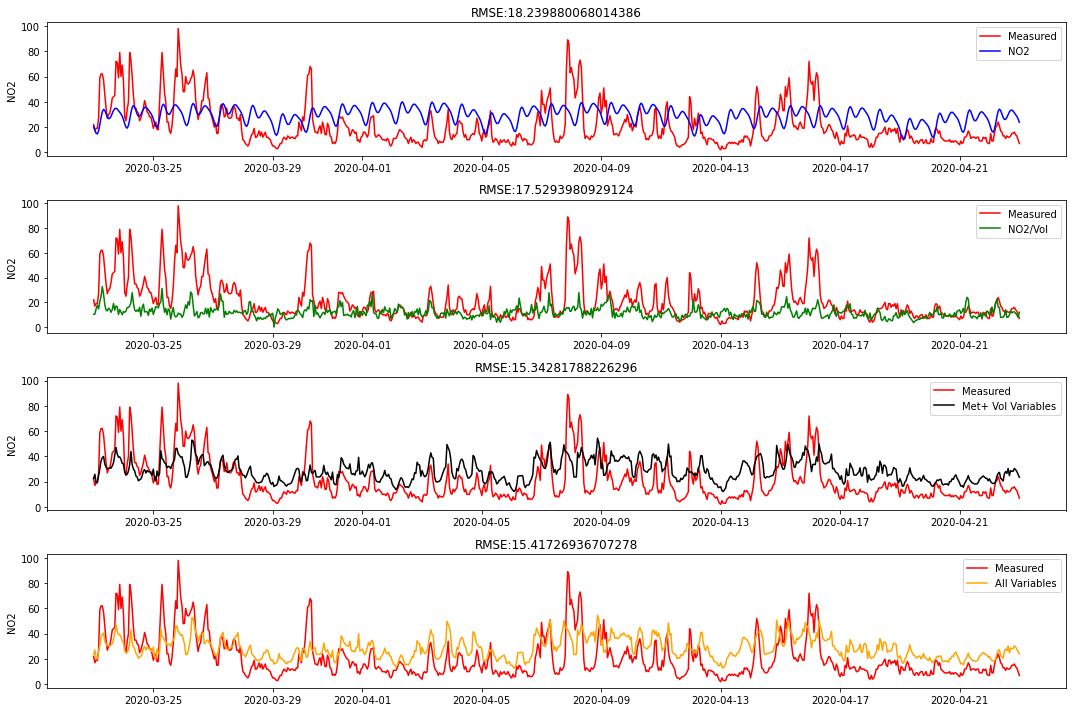

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
plt.plot(NO2_forecast['ds'],test_NO2_picadilly['y'],color='r',label='Measured')
plt.plot(NO2_forecast['ds'],NO2_forecast['yhat'],color='b',label='NO2')
measured = test_NO2_picadilly['y']
predicted = NO2_forecast['yhat']
plt.title (f'RMSE:{mean_squared_error(measured,predicted,squared=False)}')
plt.ylabel('NO2')

plt.legend()
plt.subplot(4,1,2)
plt.plot(NO2_forecast['ds'],test_NO2_picadilly['y'],color='r',label='Measured')
plt.plot(NO2_forecast['ds'],NO2Vol_forecast['yhat_og'],color='g',label='NO2/Vol')
plt.legend()
plt.ylabel('NO2')
measured = test_NO2_picadilly['y']
predicted = NO2Vol_forecast['yhat_og']
plt.title (f'RMSE:{mean_squared_error(measured,predicted,squared=False)}')

plt.subplot(4,1,3)
plt.plot(NO2_forecast['ds'],test_NO2_picadilly['y'],color='r',label='Measured')
plt.plot(NO2_forecast['ds'],np.exp(MetVol_regressor_forecast['yhat']),color='black',label='Met+ Vol Variables')
plt.legend()

measured = test_NO2_picadilly['y']
predicted = np.exp(MetVol_regressor_forecast['yhat'])
plt.title (f'RMSE:{mean_squared_error(measured,predicted,squared=False)}')
plt.ylabel('NO2')

plt.subplot(4,1,4)
plt.plot(NO2_forecast['ds'],test_NO2_picadilly['y'],color='r',label='Measured')
plt.plot(NO2_forecast['ds'],np.exp(all_var_regressor_forecast['yhat']),color='orange',label='All Variables')
plt.legend()
plt.ylabel('NO2')

measured = test_NO2_picadilly['y']
predicted = np.exp(all_var_regressor_forecast['yhat'])
plt.title (f'RMSE:{mean_squared_error(measured,predicted,squared=False)}')
plt.ylabel('NO2')
plt.tight_layout()